## Plot differences in SPL between belugas and narwhals

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
from pathlib import Path
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns

### Load Data

In [2]:
# import beluga and narwhal sound pressure level (SPL) statistics
csv_dir = 'C:/Users/marie/Documents/PhD/Chapter_4/chap4_code/beluga_narwhal_click_classifier/R/spreadsheets/SPL_difference/model_input/'

# 2013 training dataset
disk_spec_0kHz = pd.read_csv(csv_dir + 'training_data_spl_diff.csv')
# Kong Oscar
kong_spec_0kHz  = pd.read_csv(csv_dir + 'testing_kong_data_spl_diff_0kHz_highpass.csv')
# Fisher Islands
fish_spec_0kHz  = pd.read_csv(csv_dir + 'testing_fish_data_spl_diff_0kHz_highpass.csv')

# join dataframes from both sites
soundtrap_spec_0kHz  = pd.concat([kong_spec_0kHz, fish_spec_0kHz])

In [3]:
## separate beluga and narwhal data
## 2013 data
narwhal_2013_spec_0kHz = disk_spec_0kHz[disk_spec_0kHz.species==85]
beluga_2013_spec_0kHz  = disk_spec_0kHz[disk_spec_0kHz.species==45]

## 0 kHz highpass
narwhal_spec_0kHz = soundtrap_spec_0kHz[soundtrap_spec_0kHz.species=="X085"]
beluga_spec_0kHz  = soundtrap_spec_0kHz[soundtrap_spec_0kHz.species=="X045"]

In [4]:
## select only TOL calculations
narwhal_reson_spec = narwhal_2013_spec_0kHz[["eventId","spl_diff_16to25_TOL_dB","spl_diff_25to40_TOL_dB"]]
beluga_reson_spec = beluga_2013_spec_0kHz[["eventId","spl_diff_16to25_TOL_dB","spl_diff_25to40_TOL_dB"]]

narwhal_soundtrap_spec = narwhal_spec_0kHz[["eventId","spl_diff_16to25_TOL_dB","spl_diff_25to40_TOL_dB"]]
beluga_soundtrap_spec = beluga_spec_0kHz[["eventId","spl_diff_16to25_TOL_dB","spl_diff_25to40_TOL_dB"]]

In [19]:
## load noise spectra
csv_dir = 'C:/Users/marie/Documents/PhD/Chapter_4/chap4_code/beluga_narwhal_click_classifier/R/spreadsheets/noise_spec/'

# 2013 training dataset
reson_noise_spec_df = pd.read_csv(csv_dir + 'reson_avg_noise_spec.csv')
narwhal_reson_noise_spec = reson_noise_spec_df[reson_noise_spec_df.species==85]
beluga_reson_noise_spec  = reson_noise_spec_df[reson_noise_spec_df.species==45]

# Kong Oscar
kong_noise_spec_0kHz  = pd.read_csv(csv_dir + 'kong_avg_noise_spec.csv')
# Fisher Islands
fish_noise_spec_0kHz  = pd.read_csv(csv_dir + 'fish_avg_noise_spec.csv')
# join dataframes from both sites
soundtrap_noise_spec  = pd.concat([kong_noise_spec_0kHz, fish_noise_spec_0kHz])
# separate species
narwhal_ST_noise_spec = soundtrap_noise_spec[soundtrap_noise_spec.species=="X085"]
beluga_ST_noise_spec  = soundtrap_noise_spec[soundtrap_noise_spec.species=="X045"]

In [20]:
# many of the beluga events don't have an accurate noise floor measurement
# need to subset the valid ones
beluga_events_noise = [1713,1714,1716,1758,1789,1967,4841,5007,5031]
beluga_ST_noise_spec_valid = beluga_ST_noise_spec.loc[beluga_ST_noise_spec['eventId'].isin(beluga_events_noise)]

Prepare dataframes for plotting

In [6]:
## prepare dataframes to plot violin plots

## 2013 dataset
df_narwhal_reson = pd.melt(narwhal_reson_spec, id_vars='eventId',\
                     value_vars=narwhal_reson_spec.loc[:,'spl_diff_16to23_dB':'spl_diff_25to40_TOL_dB'],\
                     var_name='band', value_name='dB')

df_beluga_reson = pd.melt(beluga_reson_spec, id_vars='eventId',\
                    value_vars=beluga_reson_spec.loc[:,'spl_diff_16to23_dB':'spl_diff_25to40_TOL_dB'],\
                    var_name='band', value_name='dB')

## 0 kHz highpass
df_narwhal_ST = pd.melt(narwhal_soundtrap_spec, id_vars='eventId',\
                     value_vars=narwhal_soundtrap_spec.loc[:,'spl_diff_16to23_dB':'spl_diff_25to40_TOL_dB'],\
                     var_name='band', value_name='dB')

df_beluga_ST = pd.melt(beluga_soundtrap_spec, id_vars='eventId',\
                    value_vars=beluga_soundtrap_spec.loc[:,'spl_diff_16to23_dB':'spl_diff_25to40_TOL_dB'],\
                    var_name='band', value_name='dB')

Calculate average spectra for each group across events

In [7]:
def calculate_avg_spec(spec_df):
    # convert to linear scale and calculate mean across all events (rows)
    avSpec_all_linear = (10**(spec_df/20)).mean(axis=0)
    # convert back to dB (log scale)
    avSpec_all = 20*np.log10(avSpec_all_linear)
    return(avSpec_all)

In [8]:
freq_array_reson = np.arange(0,(250000+250000/256),250000/256)[1:]
freq_array_soundtrap = np.arange(0,(72000+72000/256),(72000/256))[1:]
freq_array_soundtrap_256 = np.arange(0,(72000+72000/128),(72000/128))[1:]

narwhal_reson_avSpec = narwhal_2013_spec_0kHz.loc[:,'X1':'X256'] + 206 # add clipping level
beluga_reson_avSpec = beluga_2013_spec_0kHz.loc[:,'X1':'X256'] + 206

beluga_ST_avSpec = beluga_spec_0kHz.loc[:,'X1':'X256'] + 173 # add clipping level
narwhal_ST_avSpec = narwhal_spec_0kHz.loc[:,'X1':'X256'] + 173 # add clipping level

In [9]:
## calculate mean spec across all events
beluga_reson_avSpec_all = calculate_avg_spec(beluga_reson_avSpec)
narwhal_reson_avSpec_all = calculate_avg_spec(narwhal_reson_avSpec)

beluga_ST_avSpec_all = calculate_avg_spec(beluga_ST_avSpec)
narwhal_ST_avSpec_all = calculate_avg_spec(narwhal_ST_avSpec)

In [21]:
## calculate mean noise spec across all events
beluga_reson_noise_spec_all = calculate_avg_spec(beluga_reson_noise_spec.loc[:,'X1':'X256'] + 206)
narwhal_reson_noise_spec_all = calculate_avg_spec(narwhal_reson_noise_spec.loc[:,'X1':'X256'] + 206)

beluga_ST_noise_spec_all = calculate_avg_spec(beluga_ST_noise_spec_valid.loc[:,'X1':'X128'] + 173)
narwhal_ST_noise_spec_all = calculate_avg_spec(narwhal_ST_noise_spec.loc[:,'X1':'X128'] + 173)

### Plot Reson data

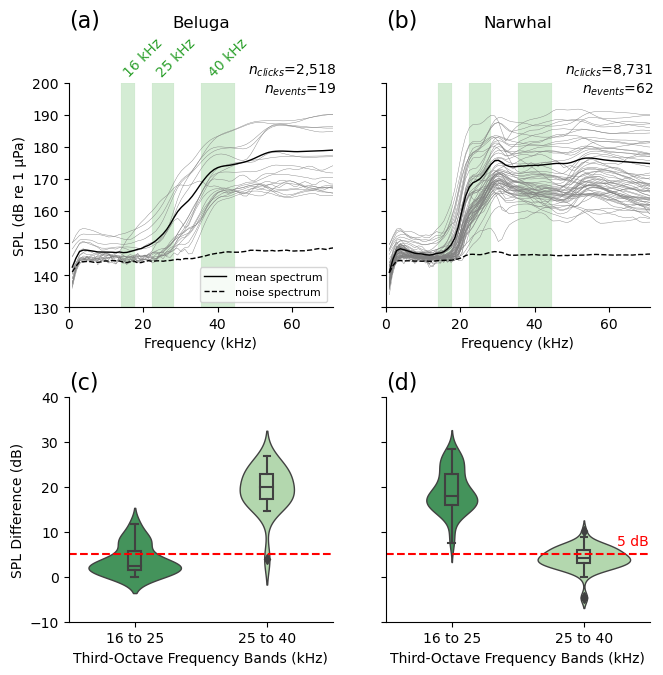

In [20]:
plt.rcParams['figure.figsize'] = (7.5,7)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
plt.subplots_adjust(hspace=0.4)

## top two plots: mean power spectra for each species

## beluga events
for i in range(len(beluga_reson_avSpec.iloc[:,0])):
    ax1.plot(freq_array_reson/1000, beluga_reson_avSpec.iloc[i,:],'gray',linewidth=0.3)
ax1.plot(freq_array_reson/1000,beluga_reson_avSpec_all,'k', linewidth=1,label='mean spectrum')
ax1.set_ylabel("SPL (dB re 1 μPa)")

## narwhal events
for i in range(len(narwhal_reson_avSpec.iloc[:,0])):
    ax2.plot(freq_array_reson/1000, narwhal_reson_avSpec.iloc[i,:],'gray',linewidth=0.3)
ax2.plot(freq_array_reson/1000,narwhal_reson_avSpec_all,'k', linewidth=1)

## add mean noise spectra to top two plots
ax1.plot(freq_array_reson/1000,beluga_reson_noise_spec_all,'k',\
         linewidth=1,linestyle='dashed',label='noise spectrum')
ax1.legend(loc='lower right',fontsize=8)
ax2.plot(freq_array_reson/1000,narwhal_reson_noise_spec_all,'k',\
         linewidth=1,linestyle='dashed')

## bottom two panels: SPL difference between two frequency bands
sns.violinplot(x=df_beluga_reson['band'],y=df_beluga_reson['dB'],palette='Greens_r',\
               inner=None, linewidth=1,width=0.7,ax=ax3);
sns.boxplot(x='band', y='dB', data=df_beluga_reson, width=0.1,palette='Greens_r',
            boxprops={'zorder': 2}, ax=ax3)

ax3.set_ylabel("SPL Difference (dB)")
ax3.set_xlabel("Frequency Band (kHz)");

sns.violinplot(x=df_narwhal_reson['band'],y=df_narwhal_reson['dB'],palette='Greens_r',\
               inner=None, linewidth=1,width=0.7,ax=ax4);
sns.boxplot(x='band', y='dB', data=df_narwhal_reson, width=0.1,palette='Greens_r',
            boxprops={'zorder': 2}, ax=ax4)

for ax in (ax1,ax2):
    ax.spines[['right', 'top']].set_visible(False)
    ax.set_ylim(130,200)
    ax.set_xlim(0,71)
    ax.set_xlabel("Frequency (kHz)")
    ## add TOL freq bands
    ax.axvspan(14.13, 17.78, alpha=0.2, color='tab:green',linewidth=0.1);
    ax.axvspan(22.39, 28.18, alpha=0.2, color='tab:green',linewidth=0.1);
    ax.axvspan(35.48, 44.67, alpha=0.2, color='tab:green',linewidth=0.1);

for ax in (ax3,ax4):
    # Hide the right and top spines
    ax.spines[['right', 'top']].set_visible(False)
    ax.set_xticklabels(["16 to 25", "25 to 40"])
    ax.set_xlabel("Third-Octave Frequency Bands (kHz)")
    ax.set_ylim(-10,40)
    ax.axhline(y = 5, color = 'r', linestyle = '--')

for ax in (ax2,ax4):
    ax.set_ylabel("")
    ax.yaxis.set_ticklabels([])

labels=["(a)","(b)","(c)","(d)"]
for ax, label in zip([ax1,ax2,ax3,ax4],labels):
    ax.set_title(label, loc='left', size=16)

# add sample size number in upper right of each plot
ax2.text(72,198,'$\it{n}_{events}$=' + str(len(narwhal_2013_spec_0kHz['eventId'])), ha='right', va='center')
ax1.text(72,198,'$\it{n}_{events}$=' + str(len(beluga_2013_spec_0kHz['eventId'])),  ha='right', va='center')

ax2.text(72,204,'$\it{n}_{clicks}$=' + f"{narwhal_2013_spec_0kHz['n_dets'].sum():,}", ha='right', va='center')
ax1.text(72,204,'$\it{n}_{clicks}$=' + f"{beluga_2013_spec_0kHz['n_dets'].sum():,}",  ha='right', va='center')

# add frequency band numbers
ax1.text(14,201,'16 kHz', ha='left', va='bottom', rotation=45, color='tab:green');
ax1.text(23,201,'25 kHz', ha='left', va='bottom', rotation=45, color='tab:green');
ax1.text(37,201,'40 kHz', ha='left', va='bottom', rotation=45, color='tab:green');

ax4.text(1.25,6.3,'5 dB', ha='left', va='bottom', color='r');

ax2.set_title('Narwhal',pad=40)
ax1.set_title('Beluga',pad=40);

# plt.savefig('figures/spl_diff_fig_reson.png', bbox_inches='tight', dpi=300, facecolor='white')

### Plot SoundTrap data

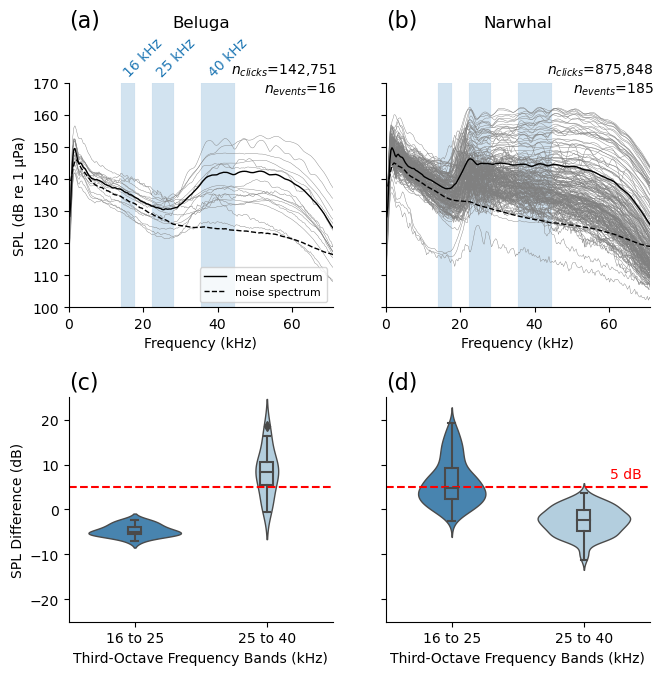

In [22]:
plt.rcParams['figure.figsize'] = (7.5,7)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
plt.subplots_adjust(hspace=0.4)

## top two plots: mean power spectra for each species

## beluga events
for i in range(len(beluga_ST_avSpec.iloc[:,0])):
    ax1.plot(freq_array_soundtrap/1000, beluga_ST_avSpec.iloc[i,:],'gray',linewidth=0.3)
ax1.plot(freq_array_soundtrap/1000,beluga_ST_avSpec_all,'k', linewidth=1,label='mean spectrum')
ax1.set_ylabel("SPL (dB re 1 μPa)")

## narwhal events
for i in range(len(narwhal_ST_avSpec.iloc[:,0])):
    ax2.plot(freq_array_soundtrap/1000, narwhal_ST_avSpec.iloc[i,:],'gray',linewidth=0.3)
ax2.plot(freq_array_soundtrap/1000,narwhal_ST_avSpec_all,'k', linewidth=1)

## add mean noise spectra to top two plots
ax2.plot(freq_array_soundtrap_256/1000,narwhal_ST_noise_spec_all,'k',\
         linewidth=1,linestyle='dashed')
ax1.plot(freq_array_soundtrap_256/1000,beluga_ST_noise_spec_all,'k',\
         linewidth=1,linestyle='dashed',label='noise spectrum')
ax1.legend(loc='lower right',fontsize=8)
    
## bottom two panels: SPL difference between two frequency bands
sns.violinplot(x=df_beluga_ST['band'],y=df_beluga_ST['dB'],palette='Blues_r',\
               inner=None, linewidth=1,width=0.7,ax=ax3);
sns.boxplot(x='band', y='dB', data=df_beluga_ST, width=0.1,palette='Blues_r',
            boxprops={'zorder': 2}, ax=ax3)
ax3.set_ylabel("SPL Difference (dB)")
ax3.set_xlabel("Frequency Band (kHz)");

sns.violinplot(x=df_narwhal_ST['band'],y=df_narwhal_ST['dB'],palette='Blues_r',\
               inner=None, linewidth=1,width=0.7,ax=ax4);
sns.boxplot(x='band', y='dB', data=df_narwhal_ST, width=0.1,palette='Blues_r',
            boxprops={'zorder': 2}, ax=ax4)

for ax in (ax1,ax2):
    ax.spines[['right', 'top']].set_visible(False)
    ax.set_ylim(100,170)
    ax.set_xlim(0,71)
    ax.set_xlabel("Frequency (kHz)")
    ## add TOL freq bands
    ax.axvspan(14.13, 17.78, alpha=0.2, color='tab:blue',linewidth=0.1);
    ax.axvspan(22.39, 28.18, alpha=0.2, color='tab:blue',linewidth=0.1);
    ax.axvspan(35.48, 44.67, alpha=0.2, color='tab:blue',linewidth=0.1);

for ax in (ax3,ax4):
    # Hide the right and top spines
    ax.spines[['right', 'top']].set_visible(False)
    ax.set_xticklabels(["16 to 25", "25 to 40"])
    ax.set_xlabel("Third-Octave Frequency Bands (kHz)")
    ax.set_ylim(-25,25)
    ax.axhline(y = 5, color = 'r', linestyle = '--')

for ax in (ax2,ax4):
    ax.set_ylabel("")
    ax.yaxis.set_ticklabels([])

labels=["(a)","(b)","(c)","(d)"]
for ax, label in zip([ax1,ax2,ax3,ax4],labels):
    ax.set_title(label, loc='left', size=16)

# add sample size number in upper right of each plot
ax2.text(72,168,'$\it{n}_{events}$=' + str(len(narwhal_spec_0kHz['eventId'])), ha='right', va='center')
ax1.text(72,168,'$\it{n}_{events}$=' + str(len(beluga_spec_0kHz['eventId'])),  ha='right', va='center')

ax2.text(72,174,'$\it{n}_{clicks}$=' + f"{narwhal_spec_0kHz['n_dets'].sum():,}", ha='right', va='center')
ax1.text(72,174,'$\it{n}_{clicks}$=' + f"{beluga_spec_0kHz['n_dets'].sum():,}",  ha='right', va='center')

# add frequency band numbers
ax1.text(14,171,'16 kHz', ha='left', va='bottom', rotation=45, color='tab:blue');
ax1.text(23,171,'25 kHz', ha='left', va='bottom', rotation=45, color='tab:blue');
ax1.text(37,171,'40 kHz', ha='left', va='bottom', rotation=45, color='tab:blue');

ax4.text(1.2,6.2,'5 dB', ha='left', va='bottom', color='r');

ax1.set_title('Beluga',pad=40)
ax2.set_title('Narwhal',pad=40);

plt.savefig('figures/spl_diff_fig_soundtrap.png', bbox_inches='tight', dpi=300, facecolor='white')

### Training and SoundTrap mean spectra

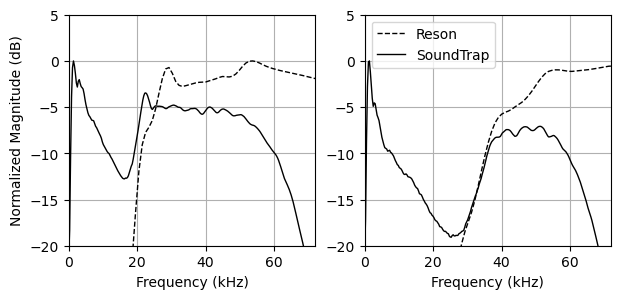

In [32]:
plt.rcParams['figure.figsize'] = (7,3)
fig, (ax1, ax2) = plt.subplots(1, 2)
plt.subplots_adjust(hspace=0.3)
ax1.plot(freq_array_reson/1000,narwhal_reson_avSpec_all-np.max(narwhal_reson_avSpec_all),'k', linewidth=1, linestyle='dashed')
ax2.plot(freq_array_reson/1000,beluga_reson_avSpec_all-np.max(beluga_reson_avSpec_all),'k', linewidth=1, linestyle='dashed', label='Reson')

ax1.plot(freq_array_soundtrap/1000,narwhal_0kHz_avSpec_all-np.max(narwhal_0kHz_avSpec_all),'k', linewidth=1)
ax2.plot(freq_array_soundtrap/1000,beluga_0kHz_avSpec_all-np.max(beluga_0kHz_avSpec_all),'k', linewidth=1, label='SoundTrap')

ax1.set_ylabel("Normalized Magnitude (dB)")

for ax in (ax1,ax2):
    ax.set_ylim(-20,5)
    ax.set_xlim(0,72)
    ax.grid()
    ax.set_xlabel("Frequency (kHz)")

ax2.legend(loc='upper left');

### Training dataset

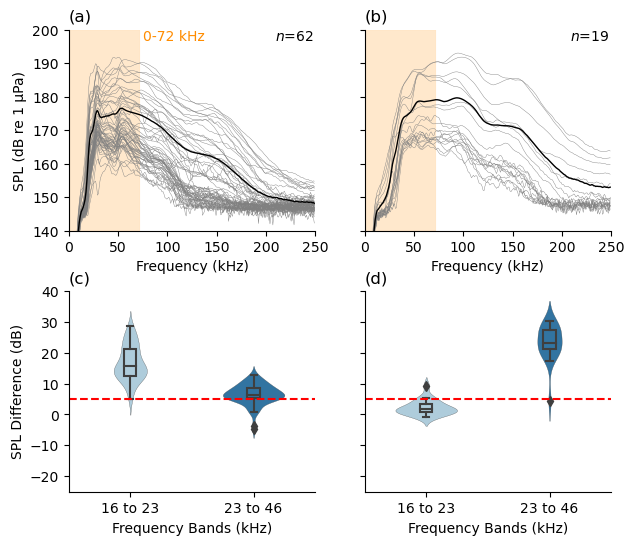

In [182]:
plt.rcParams['figure.figsize'] = (7,6)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
plt.subplots_adjust(hspace=0.3)

## top two plots: mean power spectra for each species

## narwhal events
for i in range(len(narwhal_reson_avSpec.iloc[:,0])):
    ax1.plot(freq_array_reson/1000, narwhal_reson_avSpec.iloc[i,:],'gray',linewidth=0.3)
ax1.plot(freq_array_reson/1000,narwhal_reson_avSpec_all,'k', linewidth=1)

## beluga events
for i in range(len(beluga_reson_avSpec.iloc[:,0])):
    ax2.plot(freq_array_reson/1000, beluga_reson_avSpec.iloc[i,:],'gray',linewidth=0.3)
ax2.plot(freq_array_reson/1000,beluga_reson_avSpec_all,'k', linewidth=1)

ax1.set_ylabel("SPL (dB re 1 μPa)")
    
## bottom two panels: SPL difference between two frequency bands
sns.violinplot(x=df_narwhal_2013['band'],y=df_narwhal_2013['dB'],palette='Paired',\
               inner=None, linewidth=0.2, width=0.5,ax=ax3);
sns.boxplot(x='band', y='dB', data=df_narwhal_2013, palette='Paired', width=0.1,
            boxprops={'zorder': 2}, ax=ax3)
ax3.set_ylabel("SPL Difference (dB)")
ax3.set_xlabel("Frequency Band (kHz)");

sns.violinplot(x=df_beluga_2013['band'],y=df_beluga_2013['dB'],palette='Paired',\
               inner=None, linewidth=0.2, width=0.5,ax=ax4);
sns.boxplot(x='band', y='dB', data=df_beluga_2013, palette='Paired', width=0.1,
            boxprops={'zorder': 2}, ax=ax4)

for ax in (ax1,ax2):
    ax.spines[['right', 'top']].set_visible(False)
    ax.set_ylim(140,200)
    ax.set_xlim(0,250)
    ax.set_xlabel("Frequency (kHz)")
    ax.axvspan(0, 72, alpha=0.2, color='darkorange',linewidth=0.1);

for ax in (ax3,ax4):
    # Hide the right and top spines
    ax.spines[['right', 'top']].set_visible(False)
    ax.set_xticklabels(["16 to 23", "23 to 46"])
    ax.set_xlabel("Frequency Bands (kHz)")
    ax.set_ylim(-25,40)
    ax.axhline(y = 5, color = 'r', linestyle = '--')

for ax in (ax2,ax4):
    ax.set_ylabel("")
    ax.yaxis.set_ticklabels([])

labels=["(a)","(b)","(c)","(d)"]
for ax, label in zip([ax1,ax2,ax3,ax4],labels):
    ax.set_title(label, loc='left', size=12)

# add sample size number in upper right of each plot
ax1.text(248,198,'$\it{n}$=' + str(len(narwhal_2013_spec_10kHz['eventId'])), ha='right', va='center')
ax2.text(248,198,'$\it{n}$=' + str(len(beluga_2013_spec_10kHz['eventId'])),  ha='right', va='center')

# add frequency band numbers
ax1.text(75,198,'0-72 kHz', ha='left', va='center',color='darkorange');

# plt.savefig('figures/spl_diff_fig.png', bbox_inches='tight', dpi=300, facecolor='white')

## Plot example mean spectra

In [28]:
csv_dir = 'C:/Users/marie/Documents/PhD/Chapter_4/chap4_code/beluga_narwhal_click_classifier/R/spreadsheets/ex_spec/'

In [29]:
narwhal_ex_spec = pd.read_csv(csv_dir + 'narwhal_ex_spec.csv')
beluga_ex_spec = pd.read_csv(csv_dir + 'beluga_ex_spec.csv')
narwhal_ex_spec_noise = pd.read_csv(csv_dir + 'narwhal_ex_spec_noise.csv')
beluga_ex_spec_noise = pd.read_csv(csv_dir + 'beluga_ex_spec_noise.csv')

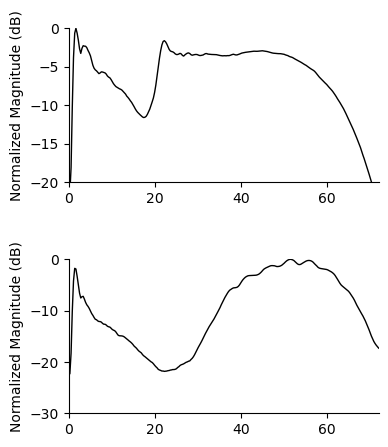

In [57]:
plt.rcParams['figure.figsize'] = (4,5)
fig, (ax1, ax2) = plt.subplots(2, 1)
plt.subplots_adjust(hspace=0.5)
## narwhal event
ax1.plot(narwhal_ex_spec.freq/1000,(narwhal_ex_spec.avgSpec-narwhal_ex_spec.avgSpec.max()),'k', linewidth=1,label='mean spectrum')
ax1.set_ylabel("Normalized Magnitude (dB)")
ax1.set_xlim(0,72)
ax1.set_ylim(-20,0)
ax1.spines[['right', 'top']].set_visible(False)

ax2.plot(beluga_ex_spec.freq/1000,beluga_ex_spec.avgSpec,'k', linewidth=1,label='mean spectrum')
ax2.set_ylabel("Normalized Magnitude (dB)")
ax2.set_xlim(0,72)
ax2.set_ylim(-30,0)
ax2.spines[['right', 'top']].set_visible(False)

plt.savefig('figures/whale_ex_spec.png', bbox_inches='tight', dpi=300, facecolor='white')